# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Diki Wahyudi
- **Email:** dikiiwahyudii11@gmail.com
- **ID Dicoding:** dikiiwahyudii11

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pola penyawaan sepeda berdasarkan waktu dan hari dalam seminggu?
- Pertanyaan 2: Faktor cuaca apa yang paling memengaruhi jumlah penyewaan sepeda?
- Pertanyaan 3: Bagaimana pola penyewaan sepeda berubah selama musim yang berbeda?
- Pertanyaan 4: Bagaimana perbandingan pola penyewa sepeda antara pengguna terdaftar (registered) dan kasual (casual)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Code untuk membuat dataframe:

In [2]:
df_day = pd.read_csv("data/day.csv")
df_hour = pd.read_csv("data/hour.csv")

Melihat cuplikan data:

In [3]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Dataset `hour.csv` dan `day.csv` mempunyai kolom berikut, kecuali `hr` yang tidak ada pada `day.csv`.

- `instant`: record index
- `dteday` : date
- `season` : season (1:springer, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` :
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

### Assessing Data

Cek tipe data:

In [5]:
df_day.info()
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

Beberapa tipe data belum sesuai, misalnya kolom `dteday` yang seharusnya dalam format `datetime`. Berdasarkan head data dan deskripsi data sebelumnya, terdapat kolom yang nilainya berupa "kode". Untuk memudahkan analis selanjutnya, kolom yang nilainya berupa "kode", misalnya `season`, akan diganti ke nilai aslinya.

Selanjutnya, akan dicek apakah terdapat missing value atau nilai duplikat atau tidak pada data.

In [6]:
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df_day.duplicated().sum()

0

In [8]:
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
df_hour.duplicated().sum()

0

Tidak ada missing value dan nilai duplikat pada data.

**Insight:**
- Beberapa tipe data masih tidak sesuai
- Beberapa kolom masih berupa "kode" sehingga perlu diubah ke nilai aslinya agar memudahkan analisis
- Tidak missing value
- Tidak ada data duplikat

### Cleaning Data

Berikut ini akan dilakukan pengubahan tipe data agar tipe datanya sesuai.

In [10]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [11]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengubah nilai dari kolom `yr`, `month`, dan `weekday` ke format tanggal agar lebih mudah dianalisis.

In [13]:
df_day['yr'] = df_day['dteday'].dt.year
df_day['mnth'] = df_day['dteday'].dt.month_name()
df_day['weekday'] = df_day['dteday'].dt.day_name()
df_hour['yr'] = df_hour['dteday'].dt.year
df_hour['mnth'] = df_hour['dteday'].dt.month_name()
df_hour['weekday'] = df_hour['dteday'].dt.day_name()

Selanjutnya, kolom `season` akan diubah sesuai nilai aslinya.

In [14]:
df_day['season'] = df_day['season'].replace({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})
df_hour['season'] = df_hour['season'].replace({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

Agar memudahkan data understanding, kolom `temp`, `atemp`, `hum`, dan `windspeed` akan dikembalikan ke nilai sebelum dinormalisasi.

In [15]:
df_day['temp'] = df_day['temp']*41
df_day['atemp'] = df_day['atemp']*50
df_day['hum'] = df_day['hum']*100
df_day['windspeed'] = df_day['windspeed']*67
df_hour['temp'] = df_hour['temp']*41
df_hour['atemp'] = df_hour['atemp']*50
df_hour['hum'] = df_hour['hum']*100
df_hour['windspeed'] = df_hour['windspeed']*67

Mengubah kolom kategorik menjadi tipe data kategorik:

In [16]:
df_day['holiday'] = df_day['holiday'].astype('category')
df_day['workingday'] = df_day['workingday'].astype('category')
df_day['weathersit'] = df_day['weathersit'].astype('category')
df_hour['holiday'] = df_hour['holiday'].astype('category')
df_hour['workingday'] = df_hour['workingday'].astype('category')
df_hour['weathersit'] = df_hour['weathersit'].astype('category')

In [17]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [18]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,0,Saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Saturday,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Saturday,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Saturday,0,1,9.84,14.395,75.0,0.0,0,1,1


In [19]:
df_day.info()
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int32         
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(3), datetime64

In [20]:
# Save hour cleaned data
df_day.to_csv("dashboard/preprocessed_day.csv", index=False)
df_hour.to_csv("dashboard/preprocessed_hour.csv", index=False)

**Insight:**
- Tipe data sudah sesuai
- Kolom dengan nilai "kode" sudah dikembalikan dengan kategori aslinya
- Kolom yang dinormalisasi sudah dikembalikan dengan nilai aslinya

## Exploratory Data Analysis (EDA)

### Statistika Deskriptif

In [21]:
df_day.describe()

,instant,dteday,yr,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2011.500684,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,2011.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2011.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,2012.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,2012.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,2012.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452


In [22]:
df_hour.describe()

,instant,dteday,yr,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2011.502561,11.546752,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,2011.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2011.000000,6.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,2012.000000,12.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,2012.000000,18.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,2012.000000,23.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.500008,6.914405,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599


### Bar Plot

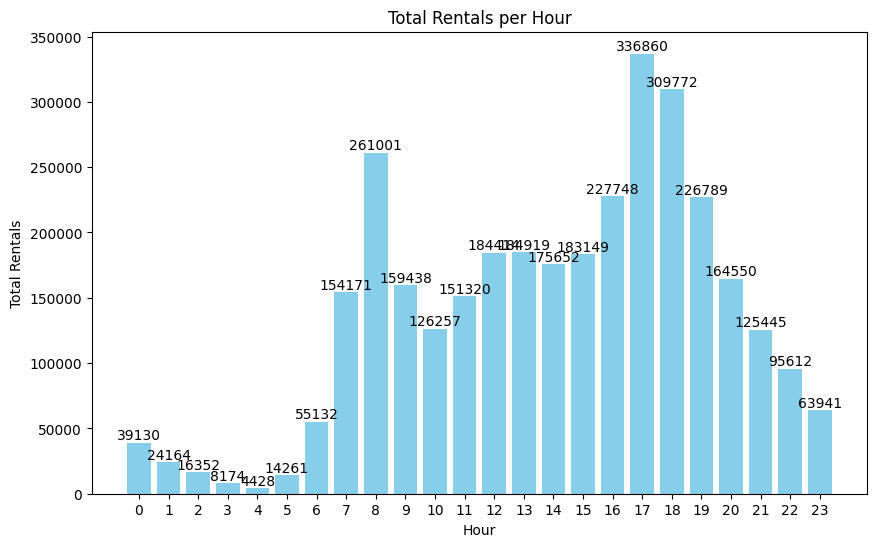

In [23]:
# Group by 'hr' and aggregate sum for the 'cnt' column
hourly_aggregate = df_hour.groupby('hr')['cnt'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(hourly_aggregate['hr'], hourly_aggregate['cnt'], color='skyblue')

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Total Rentals')
plt.title('Total Rentals per Hour')
plt.xticks(hourly_aggregate['hr'])

# Adding labels on top of each bar
for index, value in enumerate(hourly_aggregate['cnt']):
    plt.text(hourly_aggregate['hr'][index], value, str(value), ha='center', va='bottom')

plt.show()

Berdasarkan bar plot di atas, terlihat bahwa dari 17,379 pelanggan, penyewaan sepeda paling banyak terjadi sekitar pukul 18-19.

### Time Series Plot

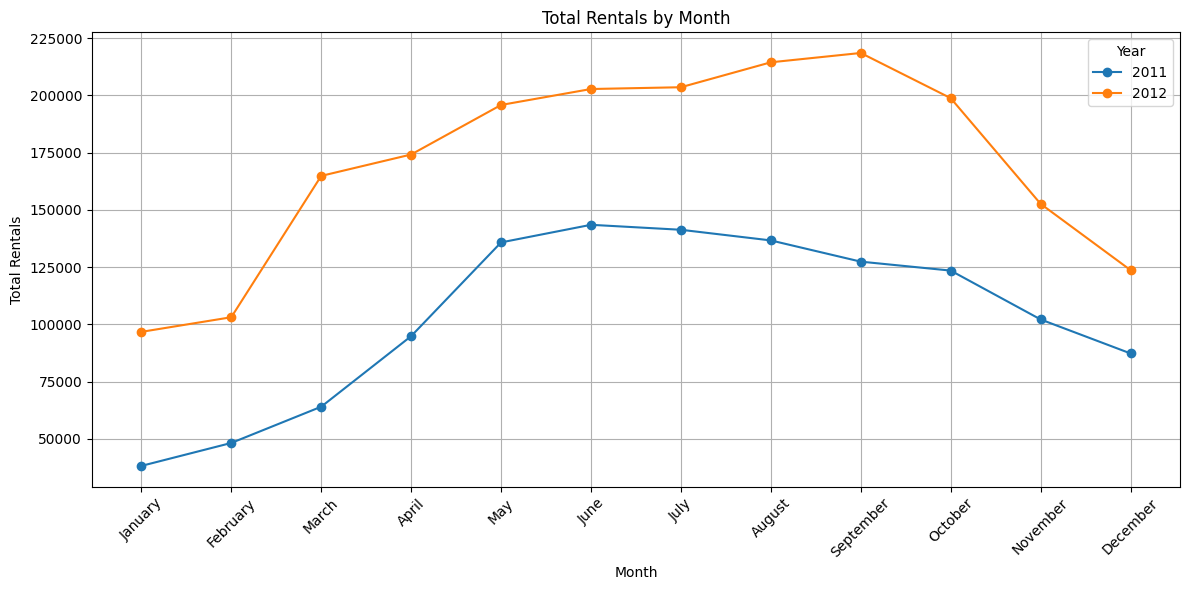

In [24]:
# Group by month and year, summing 'cnt'
monthly_data = df_day.groupby(['mnth', 'yr'])['cnt'].sum().reset_index()

# Sort months in the correct order
monthly_data['mnth'] = pd.Categorical(monthly_data['mnth'],
                                      categories=['January', 'February', 'March', 'April',
                                                  'May', 'June', 'July', 'August',
                                                  'September', 'October', 'November', 'December'],
                                      ordered=True)

# Sort the data by year and month to ensure the plot is in order
monthly_data.sort_values(by=['yr', 'mnth'], inplace=True)

# Plot the data for each year
plt.figure(figsize=(12, 6))

# Loop through each year to create separate time series
for year in monthly_data['yr'].unique():
    yearly_data = monthly_data[monthly_data['yr'] == year]
    plt.plot(yearly_data['mnth'], yearly_data['cnt'], marker='o', linestyle='-', label=str(year))

# Adding titles and labels
plt.title('Total Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid()
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

Terlihat bahwa terdapat pola musiman, di mana setiap tahun pola dari total penyewaan "cenderung" sama. Total penyawaan sepeda naik terus sampai bulan juni-september, dan mulai turun setelah bulan september.

### Pie Chart

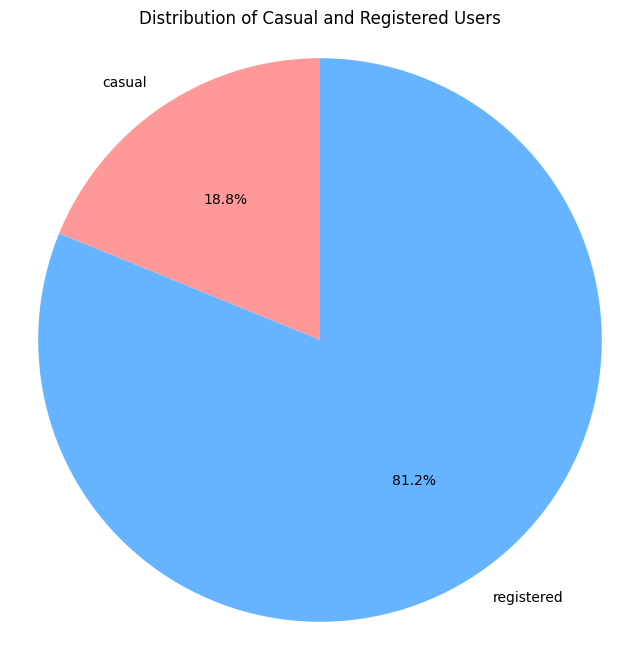

In [25]:
# Aggregate the total counts for casual and registered users
user_counts = df_day[['casual', 'registered']].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(user_counts, labels=user_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Casual and Registered Users')
plt.axis('equal')
plt.show()

Berdasarkan data, mayoritas penyewa sepeda merupakan registered user.

**Insight:**
- Dari 17,379 pelanggan, penyewaan sepeda paling banyak terjadi sekitar pukul 18-19
- Terdapat pola musiman, di mana setiap tahun pola dari total penyewaan "cenderung" sama. Total penyawaan sepeda naik terus sampai bulan juni-september, dan mulai turun setelah bulan september
- Mayoritas penyewa sepeda merupakan registered user

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penyawaan sepeda berdasarkan waktu dan hari dalam seminggu?

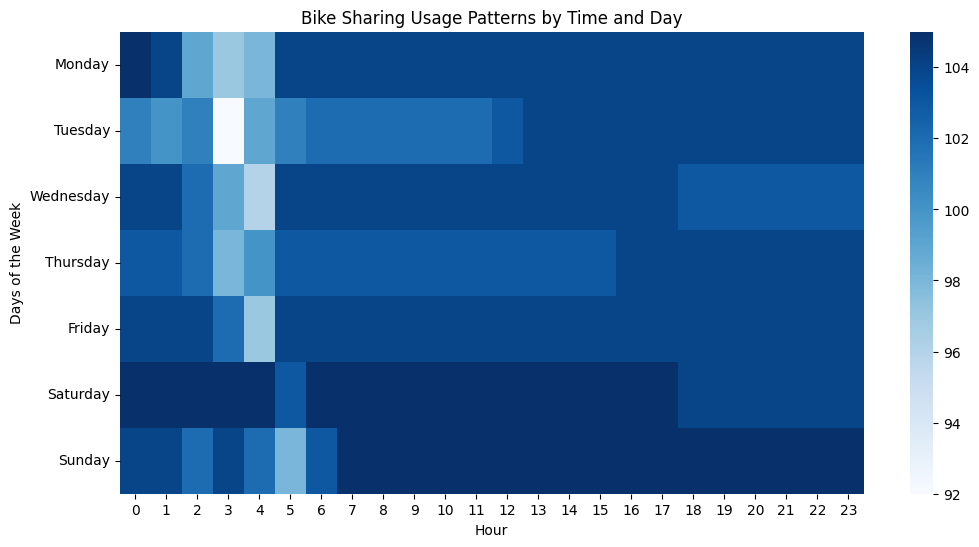

In [26]:
# Setting the order of the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_hour['weekday'] = pd.Categorical(df_hour['weekday'], categories=days_order, ordered=True)

heatmap_data = df_hour.groupby(['weekday', 'hr']).size().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="Blues", annot=False)
plt.title("Bike Sharing Usage Patterns by Time and Day")
plt.xlabel("Hour")
plt.ylabel("Days of the Week")
plt.xticks(rotation=0)
plt.show()

Dari visualisasi heatmap, dapat terlihat bahwa penyewaan sepeda meningkat secara signifikan pada akhir pekan, terutama pada sore hari.

### Pertanyaan 2: Faktor cuaca apa yang paling memengaruhi jumlah penyewaan sepeda?

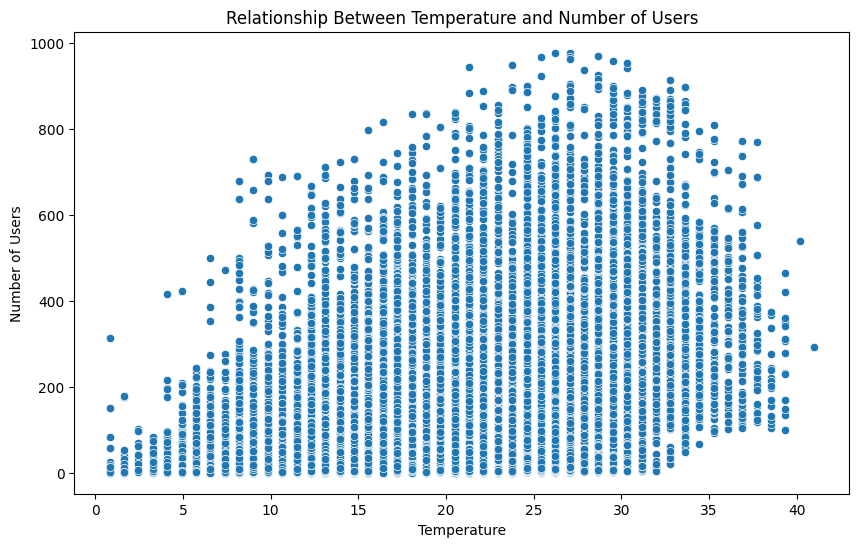

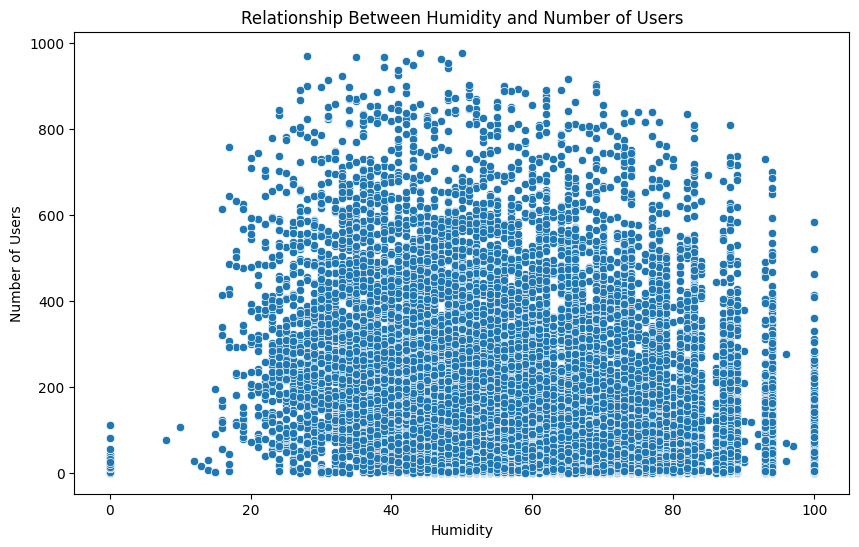

               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.987672 -0.069881  -0.023125  0.404772
atemp      0.987672  1.000000 -0.051918  -0.062336  0.400929
hum       -0.069881 -0.051918  1.000000  -0.290105 -0.322911
windspeed -0.023125 -0.062336 -0.290105   1.000000  0.093234
cnt        0.404772  0.400929 -0.322911   0.093234  1.000000


In [27]:
# Plot scatter plot to see the relationship between temperature and number of users
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df_hour)
plt.title("Relationship Between Temperature and Number of Users")
plt.xlabel("Temperature")
plt.ylabel("Number of Users")
plt.show()

# Plot scatter plot to see the relationship between humidity and number of users
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=df_hour)
plt.title("Relationship Between Humidity and Number of Users")
plt.xlabel("Humidity")
plt.ylabel("Number of Users")
plt.show()

# Calculate the correlation between weather variables and number of users
correlation_matrix = df_hour[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
print(correlation_matrix)

Analisis scatter plot menunjukkan adanya hubungan negatif antara kelembaban (humidity) dan jumlah penyewa sepeda. Selain itu, terdapat hubungan positif antara suhu (temperature) dan jumlah penyewa sepeda. Artinya, semakin tinggi suhu atau semakin rendah kelembapan, jumlah penyewa sepeda cenderung meningkat.

### Pertanyaan 3: Bagaimana pola penyewaan sepeda berubah selama musim yang berbeda?

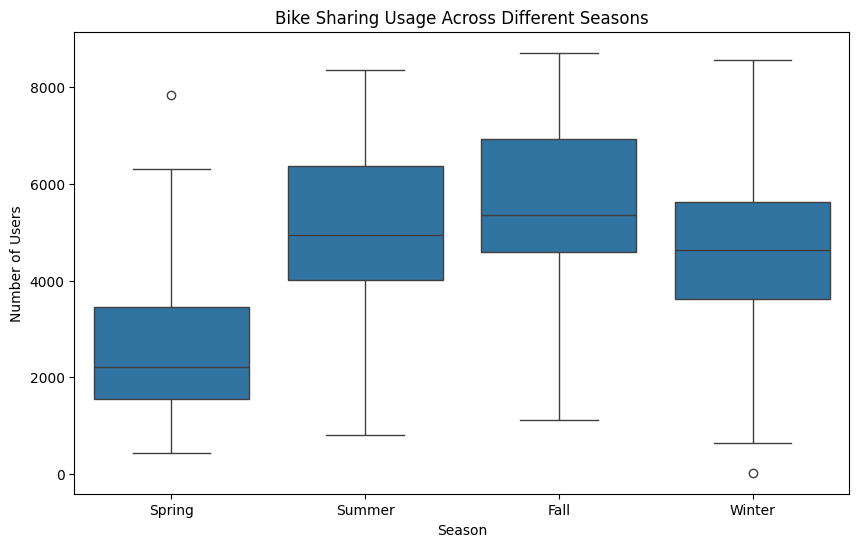

In [28]:
# Visualization of bike-sharing usage across different seasons
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df_day)
plt.title("Bike Sharing Usage Across Different Seasons")
plt.xlabel("Season")
plt.ylabel("Number of Users")
plt.show()

Box plot menunjukkan bahwa penggunaan sepeda berbagi paling tinggi pada musim gugur (fall) dan paling rendah pada musim semi (spring).

### Pertanyaan 4: Bagaimana perbandingan pola penggunaan sepeda berbagi antara pengguna terdaftar (registered) dan kasual (casual)?

<Figure size 1200x600 with 0 Axes>

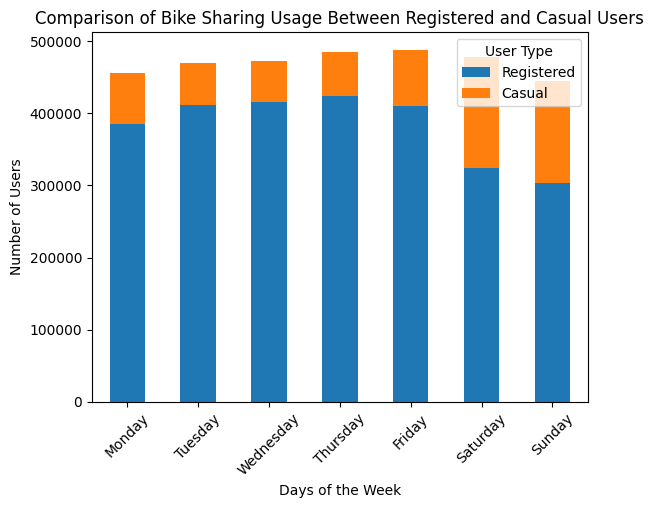

In [29]:
# Calculate the number of users based on type (registered and casual)
usage_by_type = df_day.groupby('weekday')[['registered', 'casual']].sum()

# Set the order of the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
usage_by_type = usage_by_type.reindex(days_order)

# Visualization of the comparison of bike-sharing usage patterns
plt.figure(figsize=(12, 6))
usage_by_type.plot(kind='bar', stacked=True)
plt.title("Comparison of Bike Sharing Usage Between Registered and Casual Users")
plt.xlabel("Days of the Week")
plt.ylabel("Number of Users")
plt.legend(title="User Type", labels=['Registered', 'Casual'])
plt.xticks(rotation=45)
plt.show()

Dari grafik stacked bar chart, terlihat bahwa pengguna terdaftar cenderung menggunakan sepeda secara lebih konsisten di hari kerja, sementara pengguna kasual memiliki puncak penggunaan yang lebih tinggi pada akhir pekan (sabtu dan minggu).

**Insight:**
- Penyewaan sepeda meningkat secara signifikan pada akhir pekan, terutama pada sore hari
- Terdapat hubungan negatif antara kelembaban (humidity) dan jumlah penyewa sepeda. Selain itu, terdapat hubungan positif antara suhu (temperature) dan jumlah penyewa sepeda
- Penggunaan sepeda berbagi paling tinggi pada musim gugur (fall) dan paling rendah pada musim semi (spring)
- Pengguna terdaftar cenderung menggunakan sepeda secara lebih konsisten di hari kerja, sementara pengguna kasual memiliki puncak penggunaan yang lebih tinggi pada akhir pekan (sabtu dan minggu)

## Analisis Lanjutan (Opsional)

### Simple Clustering

Selanjutnya, akan dilakukan simple clustering dengan membagi nilai temperature dan humidity menjadi 3 kelas. Hal ini dilakukan untuk melihat distribusi dari kelas-kelas yang tersebut apakah terdapat perbedaan yang signifikan terhadap jumlah pengguna registered atau casual.

In [30]:
# Categorizing the 'temp', 'atemp', 'hum', and 'windspeed' columns
bins_temp = [0, 15, 30, 40]
bins_atemp = [0, 20, 35, 50]
bins_hum = [0, 40, 70, 100]
bins_windspeed = [0, 20, 40, 60]

labels = ['Low', 'Medium', 'High']

df_day['temp_category'] = pd.cut(df_day['temp'], bins=bins_temp, labels=labels)
df_day['atemp_category'] = pd.cut(df_day['atemp'], bins=bins_atemp, labels=labels)
df_day['hum_category'] = pd.cut(df_day['hum'], bins=bins_hum, labels=labels)
df_day['windspeed_category'] = pd.cut(df_day['windspeed'], bins=bins_windspeed, labels=labels)

# Grouping by category and calculating totals
grouped_counts = df_day.groupby(['temp_category'], observed=False)[['registered', 'casual']].sum()

# Calculating percentages
total_counts = grouped_counts.sum(axis=1)
percentages = grouped_counts.div(total_counts, axis=0) * 100

# Displaying the result
print(percentages)

               registered     casual
temp_category                       
Low             88.420906  11.579094
Medium          79.533939  20.466061
High            79.076395  20.923605


In [31]:
# Grouping by category and calculating totals
grouped_counts = df_day.groupby(['hum_category'], observed=False)[['registered', 'casual']].sum()

# Calculating percentages
total_counts = grouped_counts.sum(axis=1)
percentages = grouped_counts.div(total_counts, axis=0) * 100

# Displaying the result
print(percentages)

              registered     casual
hum_category                       
Low            79.975308  20.024692
Medium         81.167789  18.832211
High           81.328914  18.671086


Terlihat bahwa temperature low (0-15) dan humidity low (0-40) berbeda proporsinya dengan kategori medium dan high-nya, secara masing-masing.

## Conclusion

- Conclusion pertanyaan 1: Heatmap menunjukkan peningkatan signifikan penyewaan sepeda pada akhir pekan, terutama sore hari, yang dapat menciptakan peluang promosi khusus.
- Conclusion pertanyaan 2: Scatter plot menunjukkan hubungan negatif antara kelembaban dan penyewa sepeda, serta hubungan positif antara suhu dan penyewa. Hal ini menunjukkan bahwa cuaca yang nyaman, khususnya suhu hangat dan kelembaban rendah, berperan penting dalam keputusan pengguna untuk menggunakan sepeda.
- Conclusion pertanyaan 3: Box plot menunjukkan penggunaan sepeda tertinggi di musim gugur dan terendah di musim semi, menandakan pengaruh musim terhadap frekuensi penyewaan sepeda.
- Conclusion pertanyaan 4: Grafik stacked bar menunjukkan pengguna terdaftar lebih konsisten di hari kerja, sementara pengguna kasual puncaknya di akhir pekan. Hal ini menunjukkan potensi menarik pengguna kasual untuk menjadi terdaftar melalui insentif dan promosi.